### KNN 모델

In [58]:
from sklearn.datasets import load_iris
import numpy as np


In [59]:
# iris 데이터셋 가져오기

iris = load_iris()

In [60]:
# 데이터프레임으로 변환
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = 'setora'
df.loc[df['target'] == 1, 'target'] = 'versicolor'
df.loc[df['target'] == 2, 'target'] = 'virginica'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setora
1,4.9,3.0,1.4,0.2,setora
2,4.7,3.2,1.3,0.2,setora
3,4.6,3.1,1.5,0.2,setora
4,5.0,3.6,1.4,0.2,setora
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
# 데이터 준비

sepal_length = df['sepal length (cm)'].to_numpy()
sepal_width = df['sepal width (cm)'].to_numpy()
petal_length = df['petal length (cm)'].to_numpy()
petal_width = df['petal width (cm)'].to_numpy()

<AxesSubplot:>

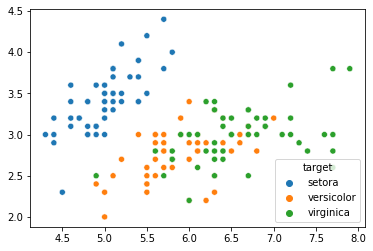

In [63]:
# 데이터 탐색

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=sepal_length, y=sepal_width, data=df, hue='target')

<AxesSubplot:>

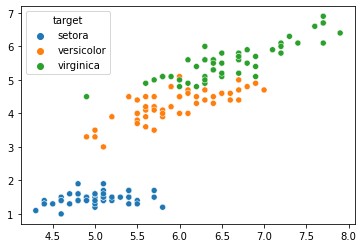

In [64]:
sns.scatterplot(x=sepal_length, y=petal_length, data=df, hue='target')

<AxesSubplot:>

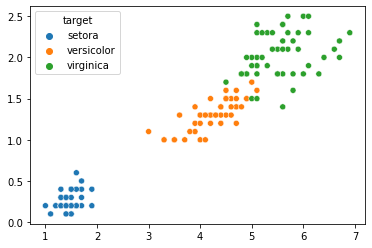

In [65]:
sns.scatterplot(x=petal_length, y=petal_width, data=df, hue='target')
# 해석: 꽃잎 길이와 꽃잎 너비가 거의 비례하게 증가한다.

<AxesSubplot:>

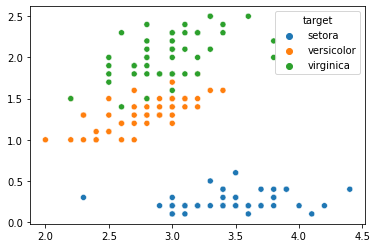

In [66]:
sns.scatterplot(x=sepal_width, y=petal_width, data=df, hue='target')

In [67]:
# 데이터 나누기(꽃잎길이와 꽃잎너비 사용)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(petal_length, petal_width, random_state=42)

print(train_input.shape, test_input.shape)

(112,) (38,)


In [68]:
# 훈련 데이터셋 2차원으로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)


(112, 1) (38, 1)


In [69]:
test_input

array([[4.7],
       [1.7],
       [6.9],
       [4.5],
       [4.8],
       [1.5],
       [3.6],
       [5.1],
       [4.5],
       [3.9],
       [5.1],
       [1.4],
       [1.3],
       [1.5],
       [1.5],
       [4.7],
       [5.8],
       [3.9],
       [4.5],
       [5.6],
       [1.6],
       [4.9],
       [1.6],
       [5.6],
       [6.4],
       [5.2],
       [5.8],
       [5.9],
       [1.4],
       [1.6],
       [1. ],
       [1.5],
       [4.4],
       [1.6],
       [1.3],
       [5. ],
       [4.5],
       [1.5]])

In [70]:
train_target

array([0.2, 0.1, 1.9, 1.6, 1.5, 0.4, 0.2, 1. , 1.5, 1.8, 1.4, 2.5, 1.3,
       2.1, 1.5, 0.2, 2. , 1. , 0.2, 0.3, 0.4, 1. , 1.8, 0.2, 0.2, 0.5,
       1.3, 0.2, 1.2, 2.2, 0.2, 1.3, 2. , 0.2, 1.8, 1.9, 1. , 1.5, 2.3,
       1.3, 0.4, 1. , 1.9, 0.2, 0.2, 1.1, 1.7, 0.2, 2.4, 0.2, 0.6, 1.8,
       1.1, 2.3, 1.6, 1.4, 2.3, 1.3, 0.2, 0.1, 1.5, 1.8, 0.2, 0.3, 0.2,
       1.5, 2.4, 0.3, 2.1, 2.5, 0.2, 1.4, 1.5, 1.8, 1.4, 2.3, 0.2, 2.1,
       1.5, 2. , 1. , 1.4, 1.4, 0.3, 1.3, 1.2, 0.2, 1.3, 1.8, 2.1, 0.4,
       1. , 2.5, 1.6, 0.1, 2.4, 0.2, 1.5, 1.9, 1.8, 1.3, 1.8, 1.3, 1.3,
       2. , 1.8, 0.2, 1.3, 1.7, 0.2, 1.2, 2.1])

In [71]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9438580883384977

### 꽃잎길이 10cm인 versicolor의 꽃잎너비 예측

In [72]:
knr.predict([[10]])

array([2.])

[[3.3 3.3 3.4 3.7 3.9]] [[16 29 13 88 98]]


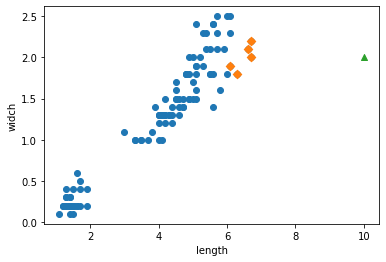

In [73]:
# 산점도로 시각화

# 이웃 확인
distances, indexes = knr.kneighbors([[10]])
print(distances, indexes)

plt.scatter(train_input, train_target)

# 이웃샘플 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 꽃잎길이 10cm인 versicolor
plt.scatter(10, 2, marker='^')
plt.xlabel('length')
plt.ylabel('widch')
plt.show()

In [74]:
print(np.mean(train_target[indexes]))

2.0000000000000004


꽃잎길이가 증가하면 꽃잎너비도 함께 증가하는 것으로 보이나, 이웃 데이터의 평균을 구하여 확인한 결과 이상치로 예측됨

In [75]:
knr.predict([[30]])

array([2.])

### 선형회귀 모델 사용

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.predict([[10]])

array([3.77715213])

In [77]:
# 회귀 계수 확인
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)

기울기: [0.41384233]
절편: -0.36127114515039804


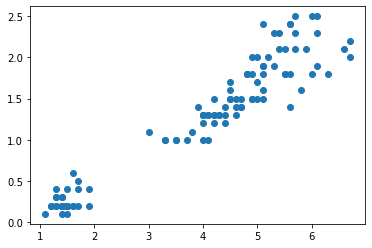

In [78]:
plt.scatter(train_input, train_target)


In [79]:
# 선형회귀 모델 평가 점수 확인 -> KNN과 비교했을 때 과소적합으로 보임
print("KNN 학습 평가 점수:", knr.score(train_input, train_target))
print("KNN 테스트 평가 점수:", knr.score(test_input, test_target),"\n")
print("선형회귀 학습 평가 점수:", lr.score(train_input, train_target))
print("선형회귀 테스트 평가 점수:", lr.score(test_input, test_target))

KNN 학습 평가 점수: 0.9379166283242846
KNN 테스트 평가 점수: 0.9438580883384977 

선형회귀 학습 평가 점수: 0.9218816722386638
선형회귀 테스트 평가 점수: 0.9398857910361995


## 다중회귀 분석

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setora
1,4.9,3.0,1.4,0.2,setora
2,4.7,3.2,1.3,0.2,setora
3,4.6,3.1,1.5,0.2,setora
4,5.0,3.6,1.4,0.2,setora
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
# 데이터 준비

vc_full = df.loc[df['target'] == 'versicolor', ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
vc_full[:5]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [81]:
# 꽃잎너비 데이터
vc_petal_width = df.loc[df['target'] == 'versicolor', 'petal width (cm)'].to_numpy()
vc_petal_width

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

In [82]:
# 데이터 분할

train_input, test_input, train_target, test_target = train_test_split(vc_full, vc_petal_width, random_state=42)

In [83]:
train_input

array([[6.6, 2.9, 4.6, 1.3],
       [5.5, 2.3, 4. , 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 3. , 4.6, 1.4],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.2, 2.7, 3.9, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [7. , 3.2, 4.7, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [5. , 2.3, 3.3, 1. ],
       [6. , 3.4, 4.5, 1.6],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.6, 4.4, 1.2],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.7, 2.8, 4.1, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 2

In [84]:
# 다중 선형 회귀 모델 적용 -> 데이터가 너무나 명확함

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

1.0
1.0


### 사이킷런의 PolynomialFeatures 클래스 활용

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 1 제외
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [86]:
print(train_poly[:5])
print(test_poly[:5])

[[ 6.6   2.9   4.6   1.3  43.56 19.14 30.36  8.58  8.41 13.34  3.77 21.16
   5.98  1.69]
 [ 5.5   2.3   4.    1.3  30.25 12.65 22.    7.15  5.29  9.2   2.99 16.
   5.2   1.69]
 [ 6.3   3.3   4.7   1.6  39.69 20.79 29.61 10.08 10.89 15.51  5.28 22.09
   7.52  2.56]
 [ 6.1   3.    4.6   1.4  37.21 18.3  28.06  8.54  9.   13.8   4.2  21.16
   6.44  1.96]
 [ 5.7   2.9   4.2   1.3  32.49 16.53 23.94  7.41  8.41 12.18  3.77 17.64
   5.46  1.69]]
[[ 6.1   2.9   4.7   1.4  37.21 17.69 28.67  8.54  8.41 13.63  4.06 22.09
   6.58  1.96]
 [ 5.5   2.5   4.    1.3  30.25 13.75 22.    7.15  6.25 10.    3.25 16.
   5.2   1.69]
 [ 5.5   2.4   3.8   1.1  30.25 13.2  20.9   6.05  5.76  9.12  2.64 14.44
   4.18  1.21]
 [ 5.7   3.    4.2   1.2  32.49 17.1  23.94  6.84  9.   12.6   3.6  17.64
   5.04  1.44]
 [ 5.8   2.7   4.1   1.   33.64 15.66 23.78  5.8   7.29 11.07  2.7  16.81
   4.1   1.  ]]


### PolynomialFeatures로 다중회귀모델 훈련

In [87]:
# 이미 너무나 완벽한 결과를 이루고 있기 때문에 1.0으로 나옴

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

1.0
1.0


### 특성 스케일링

In [88]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [89]:
# StandardScaler의 평균과 표준편차
print("평균:", ss.mean_)
print("표준편차:", ss.scale_)

평균: [ 5.93243243  2.81621622  4.3027027   1.35945946 35.46675676 16.80459459
 25.70216216  8.12108108  8.03135135 12.20054054  3.86945946 18.72648649
  5.92297297  1.88675676]
표준편차: [0.52249612 0.31666635 0.46177477 0.19653685 6.22998723 2.95103793
 4.56042088 1.62421005 1.73069298 2.28538358 0.88053714 3.86245421
 1.36791193 0.52922204]


In [90]:
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

1.0
1.0


#### 릿지 회귀

In [91]:
# 1.0에서 0.99로 낮아짐. 보다 유의미해짐

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9978316800354967
0.9965861349099945


In [92]:
# alpha 값으로 조정해보기
ridge_train_score=[]
ridge_test_score=[]
for alpha in [0.1, 1, 10]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    ridge_train_score.append(ridge.score(train_scaled, train_target))
    ridge_test_score.append(ridge.score(test_scaled, test_target))

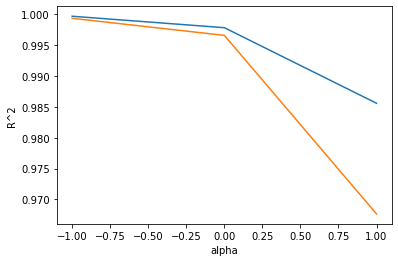

In [93]:
# 그래프 시각화

plt.plot(np.log10([0.1, 1, 10]), ridge_train_score)
plt.plot(np.log10([0.1, 1, 10]), ridge_test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 차이가 거의 나지 않음

#### 라쏘 회귀

In [94]:
# 라쏘 회귀 확인 결과, 전혀 엉뚱한 값이 나옴

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.0
-0.6570043587554044


In [95]:
# alpha 값 조정해보기

lasso_train_score = []
lasso_test_score = []

for alpha in [0.1, 1, 10]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    lasso_train_score.append(lasso.score(train_scaled, train_target))
    lasso_test_score.append(lasso.score(test_scaled, test_target))

In [96]:
print(lasso_train_score)
print(lasso_test_score)

[0.7411119515885026, 0.0, 0.0]
[0.5710213753524693, -0.6570043587554044, -0.6570043587554044]


In [98]:

print("릿지 회귀 분석 학습 평가 점수:", ridge.score(train_scaled, train_target))
print("릿지 회귀 분석 테스트 평가 점수:", ridge.score(test_scaled, test_target), "\n")
print("라쏘 회귀 분석 학습 평가 점수:", lasso.score(train_scaled, train_target))
print("라쏘 회귀 분석 테스트 평가 점수:", lasso.score(test_scaled, test_target))

릿지 회귀 분석 학습 평가 점수: 0.9855816546445197
릿지 회귀 분석 테스트 평가 점수: 0.9676440478304995 

라쏘 회귀 분석 학습 평가 점수: 0.0
라쏘 회귀 분석 테스트 평가 점수: -0.6570043587554044


다양한 회귀 모델 적용 결과,
"릿지 회귀 분석"이 제일 적절한 결과가 나오는 것을 알 수 있음.